# Transformers

We saw what Attention is in the previous tutorial and how it helps us tackle variety of different problems in tranditional neural networks

http://jalammar.github.io/illustrated-transformer/

### High level view
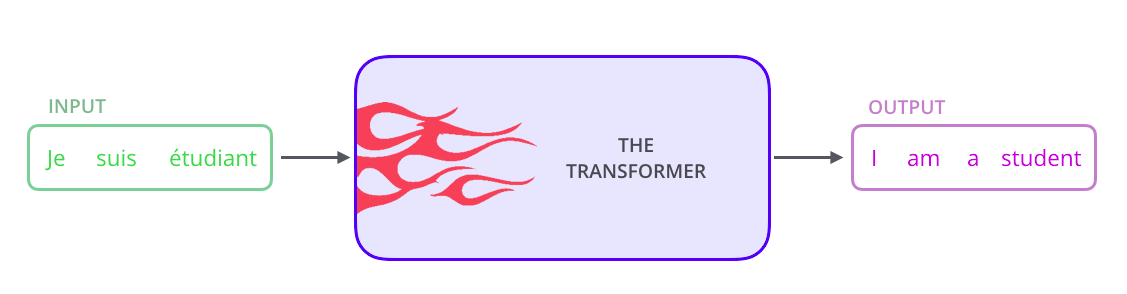

### Lets zoom in a bit
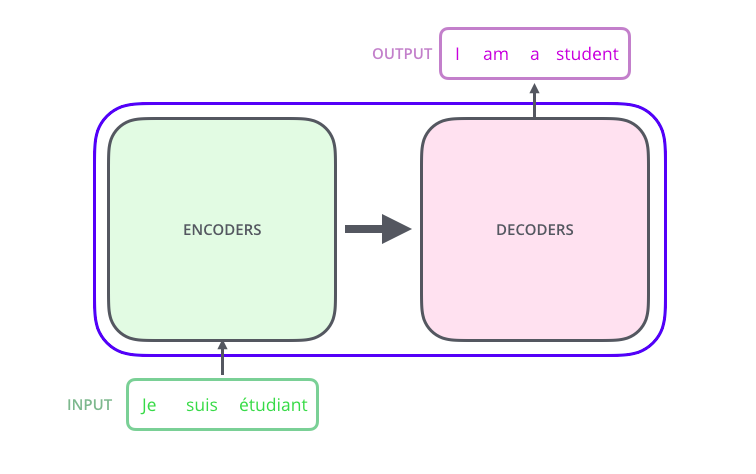

### Let's break it up even more

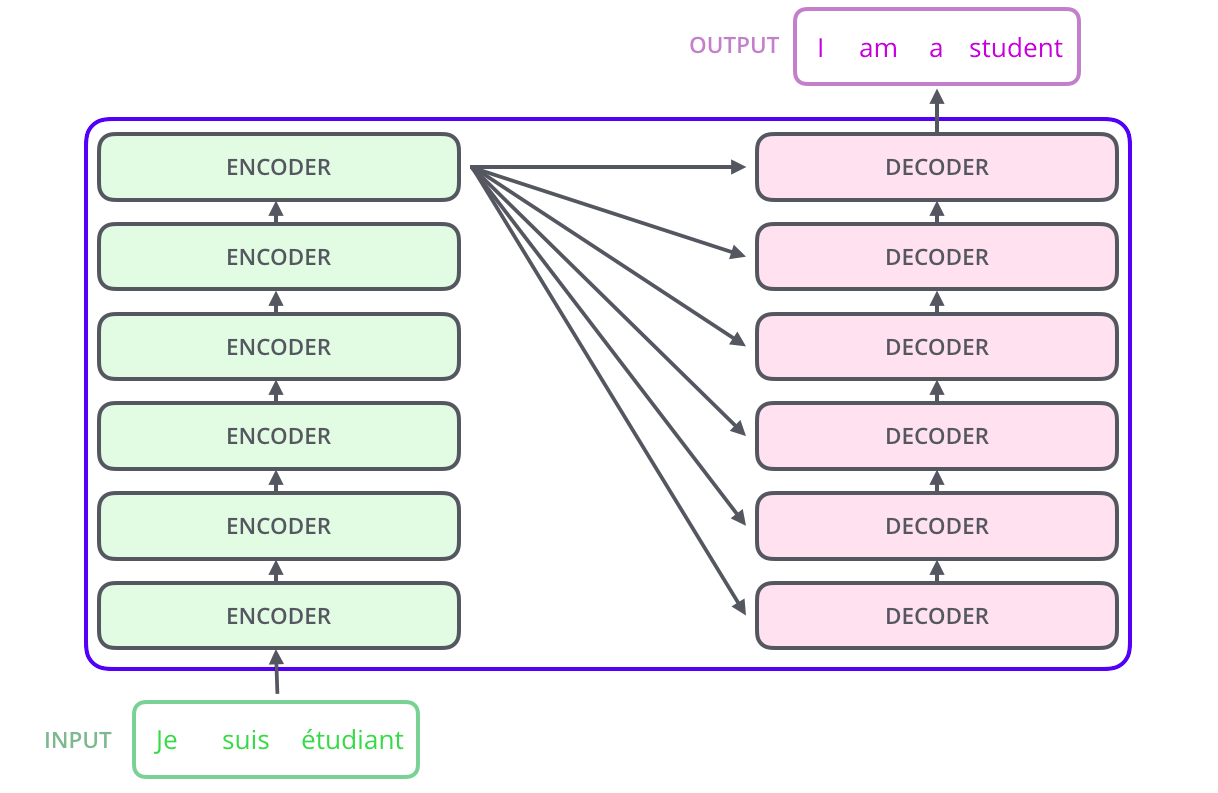

### How about even more

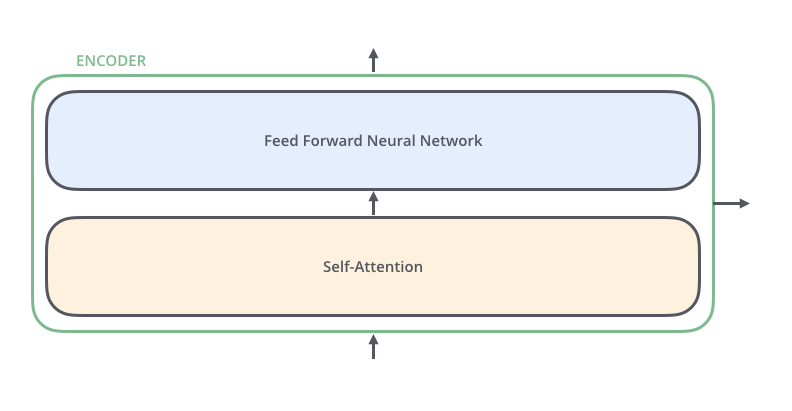

## Self-Attention

Core of the transformer module.

Nice Paper: Attention is all you need (https://arxiv.org/abs/1706.03762)

### Quick Quesion

"The animal didn't cross the street because it was too tired"

What does "it" here refers to?

  a) "animal"

  b) "street"

  c) "cross"

  d) "tired"

Quite obvious right?

We want the similar behavouir in our neural networks as well, thats where self-attention plays its role. Self-Attention in superficial terms allows each word to pay "attention" to other words, it helps each "pixel" to pay "attention" to other pixels. In general we can say that self-attention helps in each "token" paying attention to other tokens.

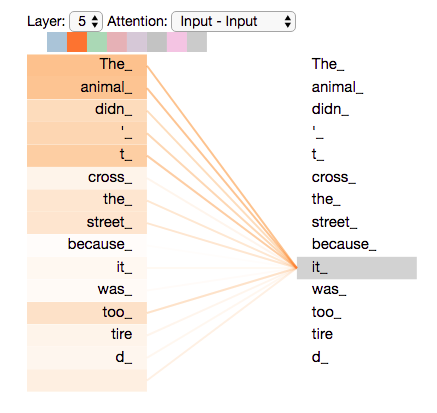

The word "it" pays more attention to "animal" than "street". Cool feature huh? Well lets dive into the math behind getting such a cool feature on our neural networks

## Modelling Self-Attention

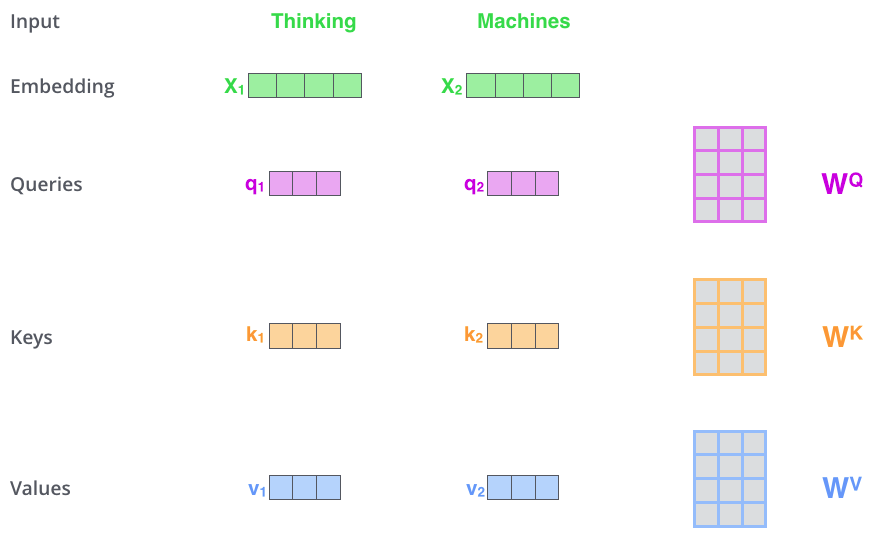

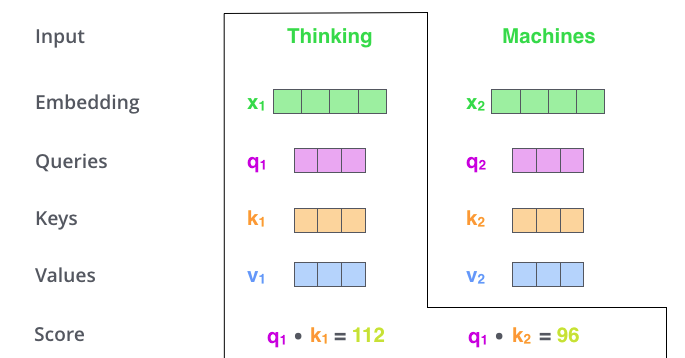

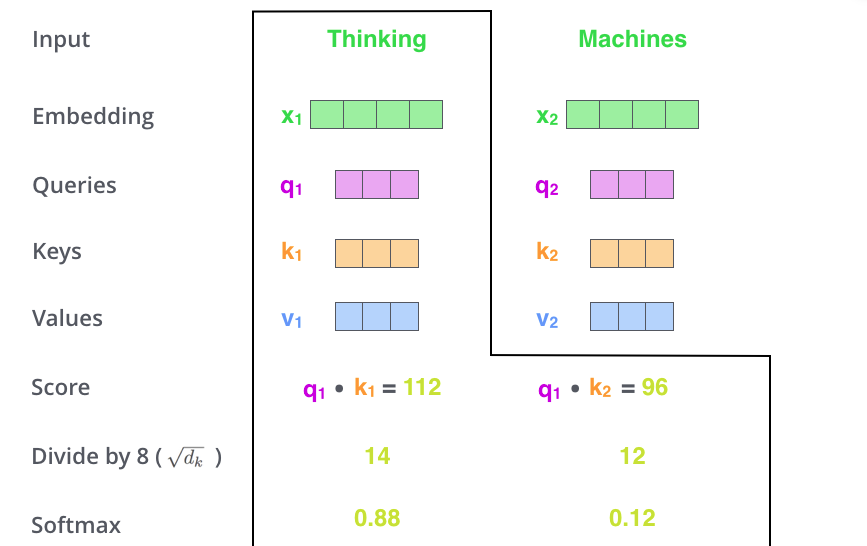

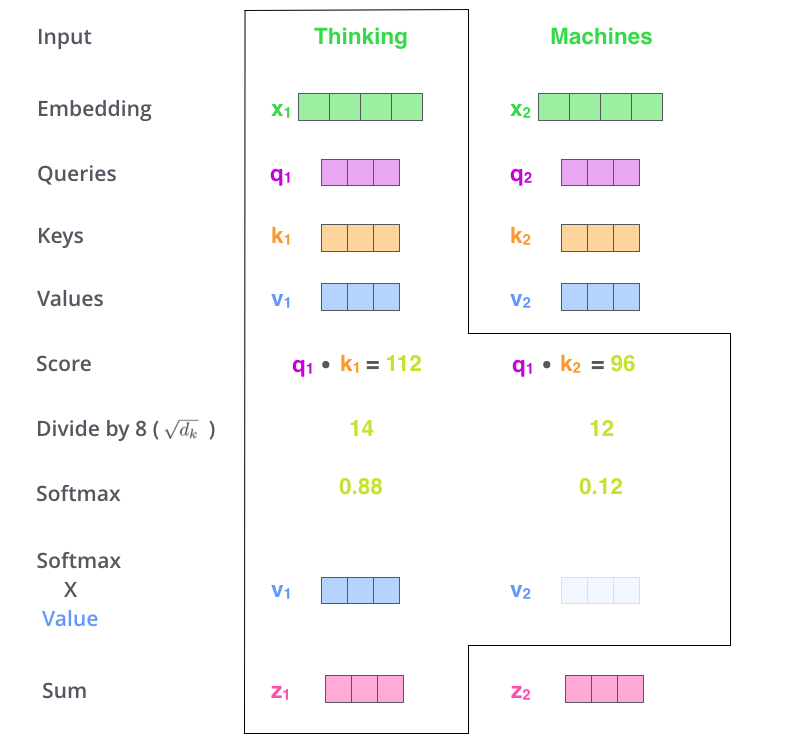

As per the architecture $z_i$ goes to the FFN

### Question

Do you think calculating Attention for every input to every other input could be costly? Let's take I have a 1000 word paragraph, the the self-attention layer will have to do $10^6$ attention computations to find the vectors.

### Parallelization



Irrespective of the number of input (tokens) embeddings we can calculate the outputs with a few simple matrix multiplication, assuming that we can load the (huge) matrices into the GPU. 

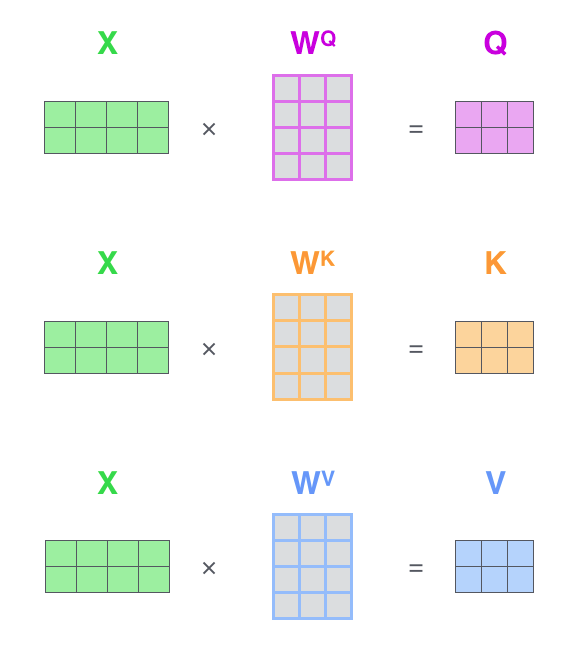

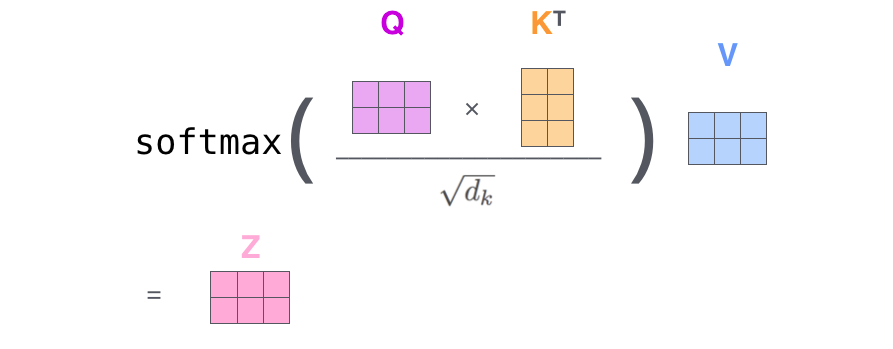

## Multi-head attention

The exact same process is going to be done multiple times with different Q,K,V matrix intialization. 

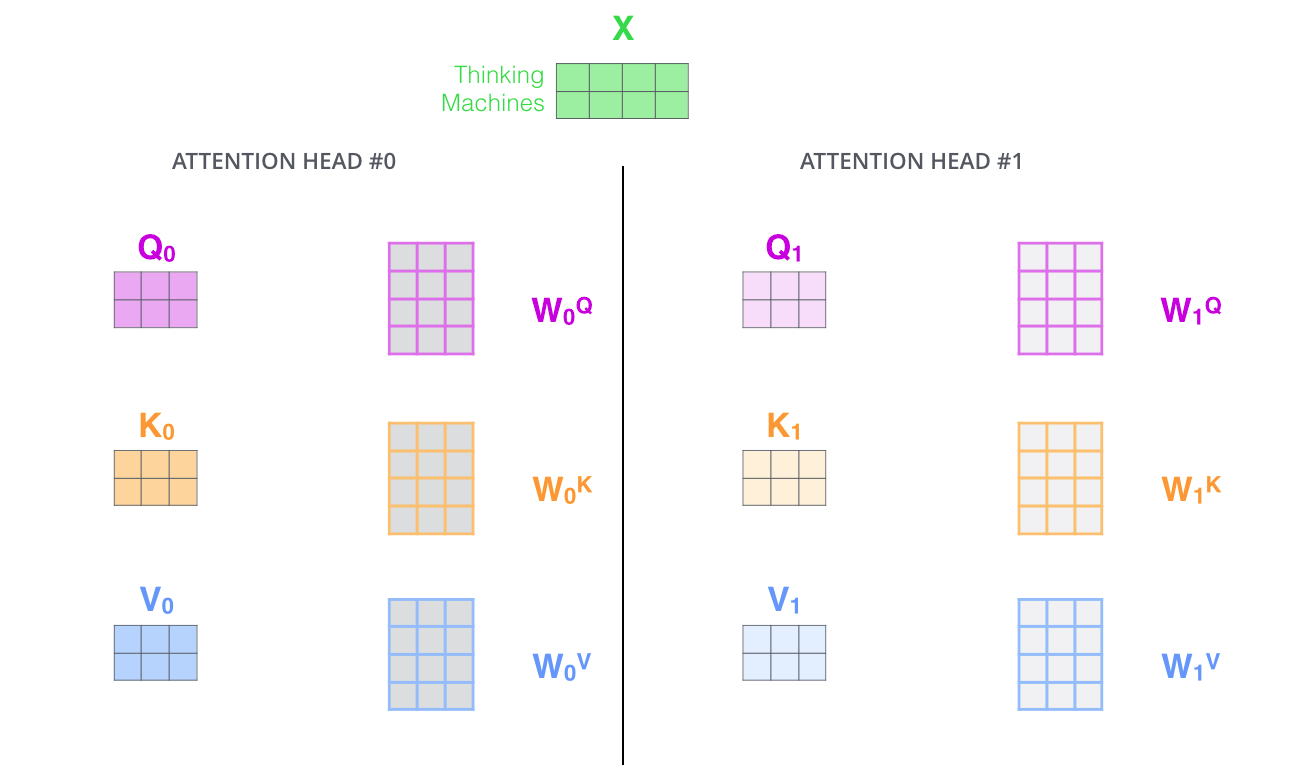

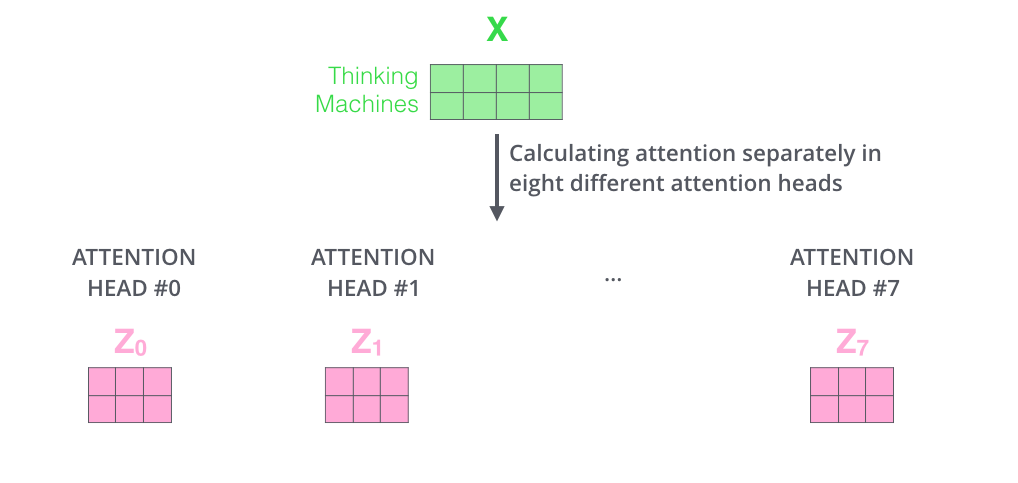

Well this adds an addional problem, as the FFN expects a single matrix not 8 !!

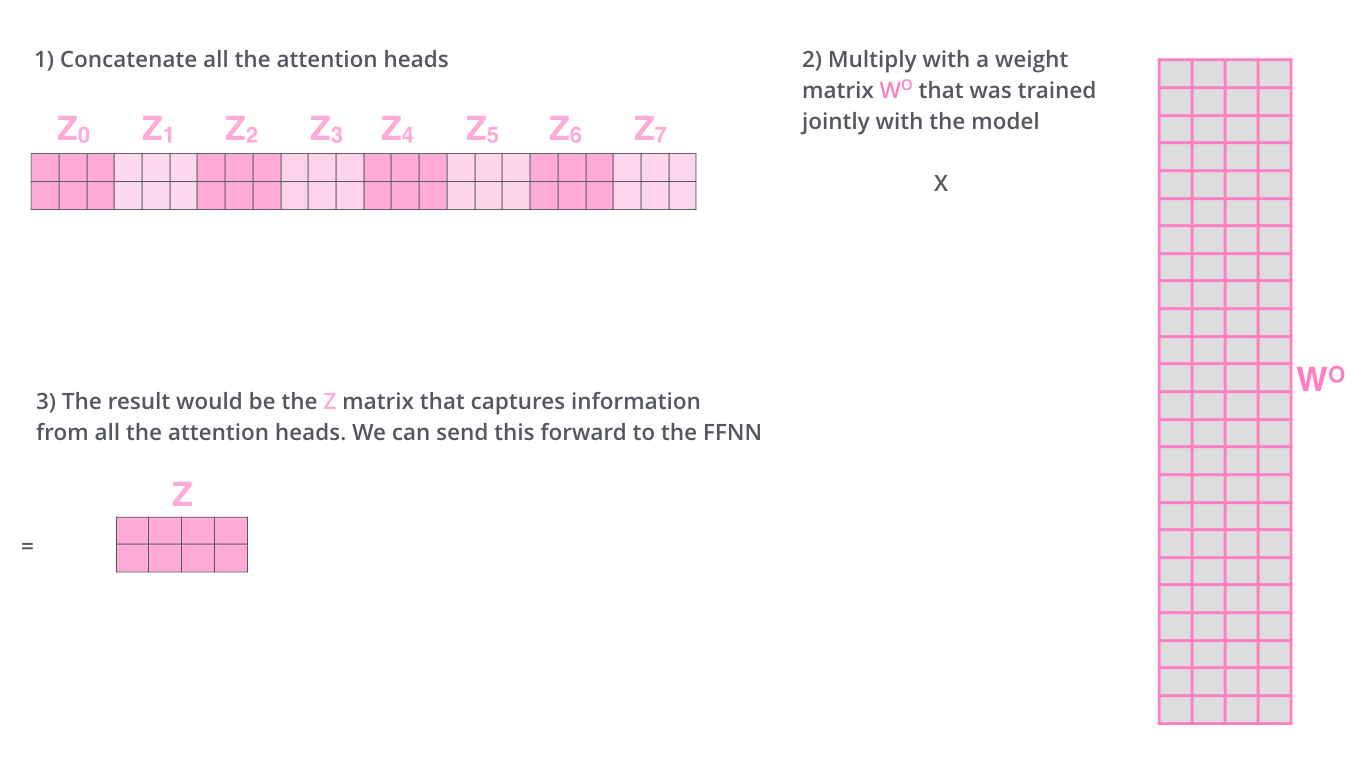

And we are done with multi-head self attention

### Overview

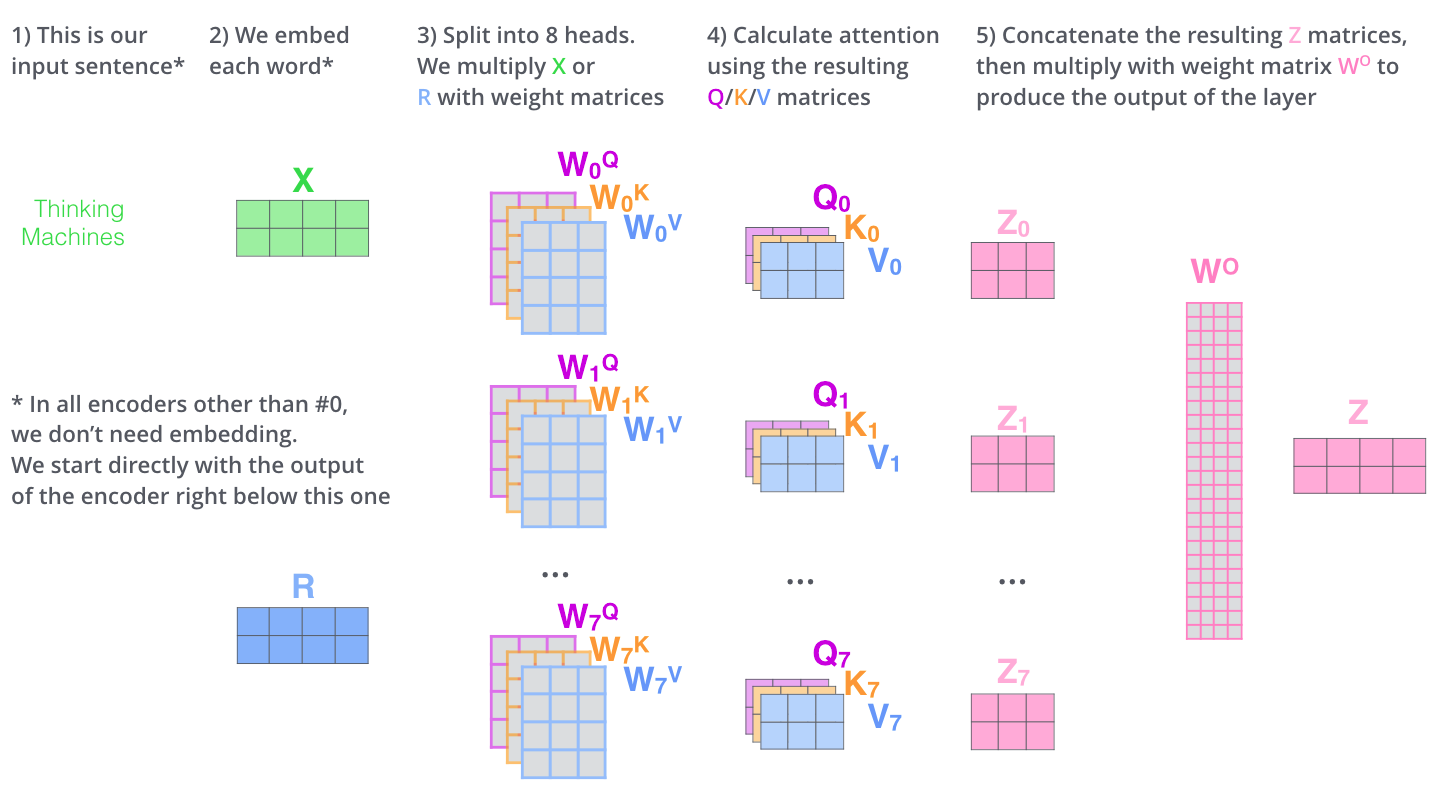

## The Decoder

In previous architectures the decoder is almost similar to the encoder side, except it does the opposite of what the encoder's functionality is, For example in CNNs decoder upsamples the image while encoder downsamples the image to the feature vector. In RNNs the decoder converts the context vector/feature vector back into the desired language. In Transformers the decoder has additional components

### Question 

What are all the inputs to a decoder block that we need? (HINT: Decoder is still a self-attention layer + MLP)

1. ??

2. ??

3. ??


Well, input is nothing but the output of the last encoder block. However, unlike in encoders where we create K,V from the input we do not do in decoders. Instead we take the K,V vectors from the encoders. Additonally in decoders have another restriction where they can only attend to earlier positions in the output sequence, whereas the encoders could use the whole input sequence. 

Finally, Keys and values for each decoder (self-attention + MLP) comes from the last encoder. Query for each decoder comes from the previous decoder (for the first decoder the query is the output of the last encoder block)

![ChessUrl](http://jalammar.github.io/images/t/transformer_decoding_1.gif "chess")

![ChessUrl](http://jalammar.github.io/images/t/transformer_decoding_1.gif "chess")

### Final Linear layer

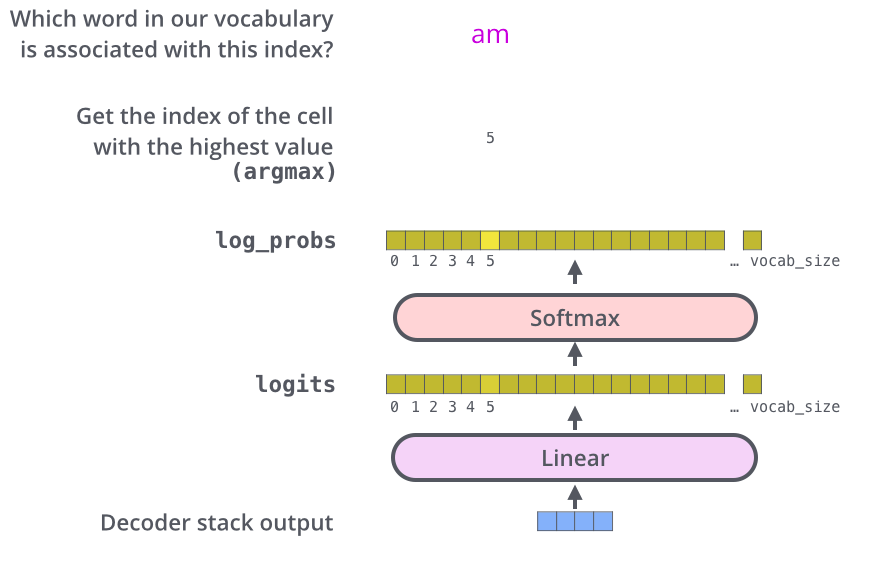

## Question

Write a multi-head self attention module

In [ ]:
# Write your code here
from torch import nn
import torch
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim=512, n_heads=8):
        """
        Args:
            embed_dim: dimension of embeding vector output
            n_heads: number of self attention heads
        """
        super(MultiHeadAttention, self).__init__()

        self.embed_dim = embed_dim    #512 dim
        self.n_heads = n_heads   #8
        self.single_head_dim = # Fill
       
        self.query_matrix =  nn.Linear(self.single_head_dim,self.single_head_dim) # Fill
        self.key_matrix =  nn.Linear(self.single_head_dim,self.single_head_dim) # Fill
        self.value_matrix =  nn.Linear(self.single_head_dim,self.single_head_dim) # Fill
        self.out = nn.Linear(self.n_heads*self.single_head_dim,self.embed_dim) # Fill

    def forward(self,key,query,value,mask=None):    #batch_size x sequence_length x embedding_dim    # 32 x 10 x 512
        
        """
        Args:
           key : key vector
           query : query vector
           value : value vector
           mask: mask for decoder
        
        Returns:
           output vector from multihead attention
        """
        batch_size = key.size(0)
        seq_length = key.size(1)
        
        # query dimension can change in decoder during inference. 
        # so we cant take general seq_length
        seq_length_query = query.size(1)

        key = key.view(batch_size,seq_length,self.n_heads,self.single_head_dim)
        value = value.view(batch_size,seq_length,self.n_heads,self.single_head_dim)
        query = query.view(batch_size,seq_length,self.n_heads,self.single_head_dim)
        
       
       
        k = self.key_matrix(key)  # Fill
        q = self.query_matrix(query) # Fill
        v = self.value_matrix(value) # Fill

        q = q.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)    # (32 x 8 x 10 x 64)
        k = k.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
        v = v.transpose(1,2)  # (batch_size, n_heads, seq_len, single_head_dim)
       
        # computes attention
        # adjust key for matrix multiplication
        k_adjusted = k.transpose(-1,-2)  #(batch_size, n_heads, single_head_dim, seq_ken)  #(32 x 8 x 64 x 10)
        product = torch.matmul(q, k_adjusted)  #(32 x 8 x 10 x 64) x (32 x 8 x 64 x 10) = #(32x8x10x10)
      
        
        # fill those positions of product matrix as (-1e20) where mask positions are 0
        if mask is not None:
             product = product.masked_fill(mask == 0, float("-1e20"))

        #divising by square root of key dimension
        product =   product / np.sqrt(self.single_head_dim)# Fill

        #applying softmax
        scores = F.softmax(product,dim = -1)# Fill
 
        #mutiply with value matrix
        scores = torch.matmul(product,v)# Fill
        
        #concatenated output
        concat = scores.transpose(1,2).contiguous().view(batch_size, seq_length_query, self.single_head_dim*self.n_heads) 
        
        output = self.out(concat)# Fill
       
        return output


## Visualization of multiple Attention heads

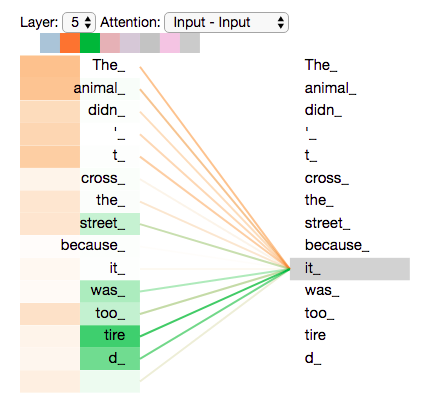

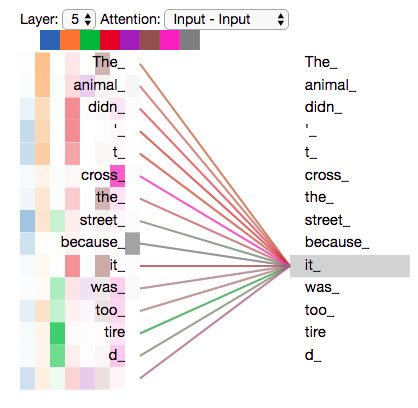

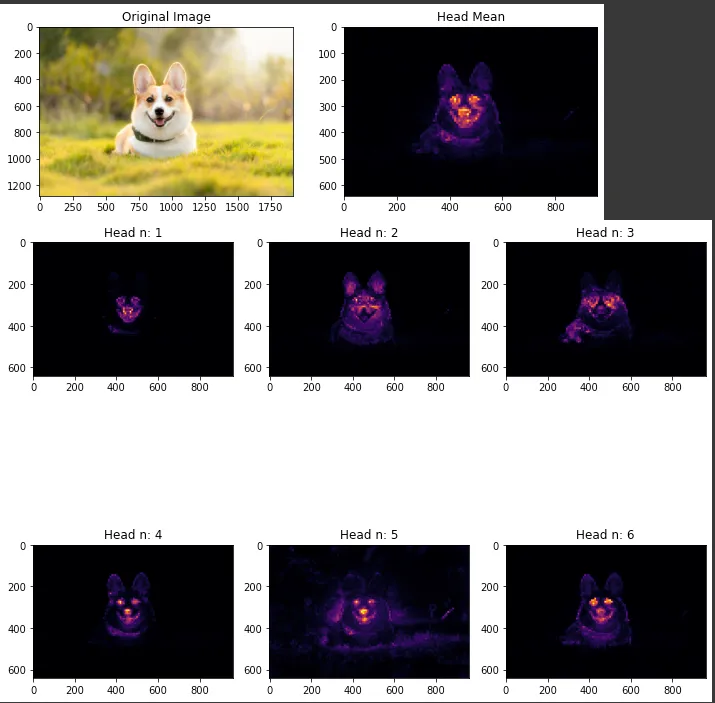

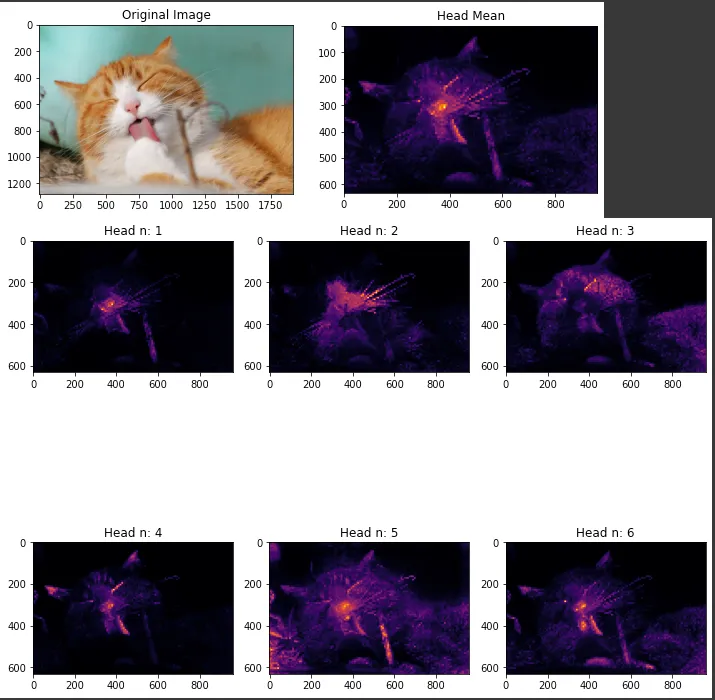

[source](https://medium.com/@aryanjadon/visualizing-attention-in-vision-transformer-c871908d86de)